In [1]:
import pandas as pd
corona = pd.read_csv('coronadatascraper-timeseries_jhu__202008140200__202008140200.csv')
bed = pd.read_csv('usa-hospital-beds_dataset_usa-hospital-beds.csv')

In [2]:
corona = corona[corona['level']=='country']
corona.head()

,locationid,slug,name,level,country,population,tz,2020_01_22,2020_01_23,2020_01_24,...,2020_08_07,2020_08_08,2020_08_09,2020_08_10,2020_08_11,2020_08_12,2020_08_13,2020_08_14,last_updated_at,state_fips
0,iso1:ad,ad,AD,country,Andorra,76177.0,Europe/Andorra,0,0.0,0.0,...,955.0,955.0,955.0,963.0,963.0,963.0,963.0,963.0,2020-08-14T02:02:03,NaN
1,iso1:ae,ae,AE,country,United Arab Emirates,90145.0,Asia/Dubai,0,0.0,0.0,...,62061.0,62300.0,62525.0,62704.0,62966.0,62966.0,62966.0,62966.0,2020-08-14T02:02:03,NaN
2,iso1:af,af,AF,country,Afghanistan,349837.0,Asia/Kabul,0,0.0,0.0,...,37015.0,37054.0,37054.0,37162.0,37269.0,37269.0,37269.0,37269.0,2020-08-14T02:02:03,NaN
3,iso1:ag,ag,AG,country,Antigua and Barbuda,12.0,America/Antigua,0,0.0,0.0,...,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,2020-08-14T02:02:03,NaN
4,iso1:al,al,AL,country,Albania,2873457.0,Europe/Tirane,0,0.0,0.0,...,6151.0,6275.0,6411.0,6536.0,6676.0,6676.0,6676.0,6676.0,2020-08-14T02:02:03,NaN


In [3]:
corona=corona.fillna(method='ffill',axis='columns')

In [4]:
corona = corona.groupby('country').sum()

In [5]:
'United States' in corona.index

True

In [6]:
cases = corona[corona.columns[6:210]].T
cases.tail()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican City,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
2020_08_08,37054.0,6275.0,34693.0,955.0,1572.0,92.0,241811.0,40185.0,20272.0,21936.0,...,4967754.0,528.0,1335.0,29652.0,12.0,24961.0,351.0,1797.0,7903.0,4575.0
2020_08_09,37054.0,6411.0,35160.0,955.0,1672.0,92.0,246499.0,40410.0,20698.0,22024.0,...,5019073.0,528.0,1353.0,30609.0,12.0,25805.0,351.0,1804.0,8085.0,4649.0
2020_08_10,37162.0,6536.0,35712.0,963.0,1679.0,92.0,253868.0,40433.0,21084.0,22122.0,...,5060880.0,547.0,1364.0,31304.0,12.0,26800.0,351.0,1832.0,8210.0,4748.0
2020_08_11,37269.0,6676.0,36204.0,963.0,1735.0,92.0,260911.0,40593.0,21397.0,22313.0,...,5116474.0,576.0,1385.0,31747.0,12.0,27938.0,351.0,1831.0,8275.0,4818.0
2020_08_12,37269.0,6676.0,36204.0,963.0,1735.0,92.0,260911.0,40593.0,21713.0,22459.0,...,5172216.0,639.0,1385.0,31747.0,12.0,27938.0,351.0,1831.0,8275.0,4818.0


In [7]:
print(cases.columns)

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United States', 'United States Virgin Islands', 'Uruguay',
       'Uzbekistan', 'Vatican City', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='country', length=197)


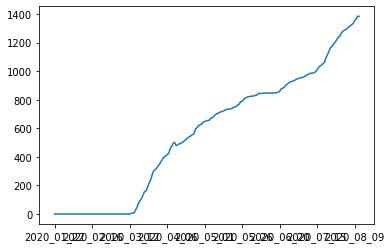

In [8]:
cases['Uruguay'].plot()

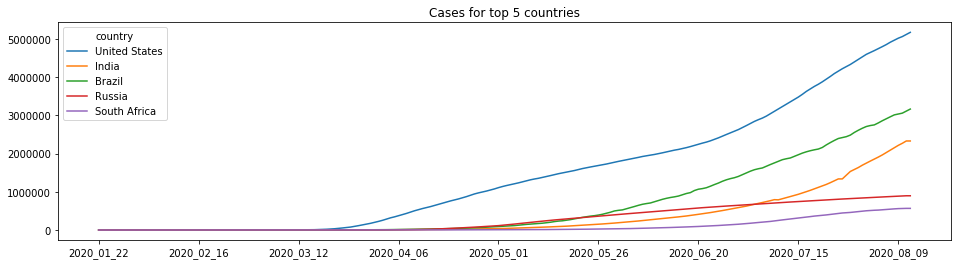

In [9]:
cases[['United States','India', 'Brazil','Russia','South Africa']].plot(figsize=(16,4), title='Cases for top 5 countries')

In [12]:
cases['Col_sum'] = cases.apply(lambda x: x.sum(), axis=1)

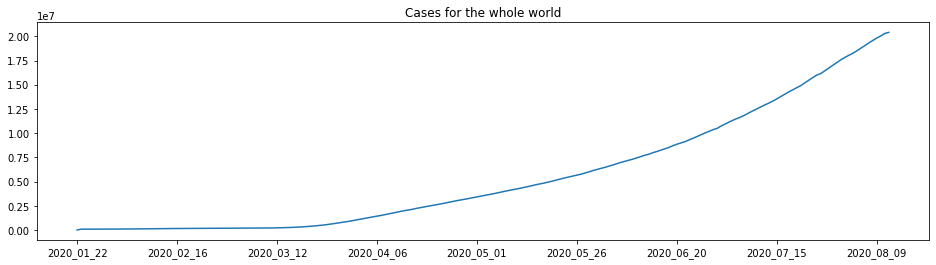

In [13]:
cases['Col_sum'].plot(figsize=(16,4), title='Cases for the whole world')

In [18]:
current = cases.loc['2020_08_12']
current.sort_values(ascending=False)[:11]

country
Col_sum          20409693.0
United States     5172216.0
Brazil            3164785.0
India             2329638.0
Russia             895691.0
South Africa       566109.0
Mexico             492522.0
Peru               489680.0
Colombia           410453.0
Chile              376616.0
Iran               331189.0
Name: 2020_08_12, dtype: float64